<a href="https://colab.research.google.com/github/monteksz/Machine-Learning/blob/main/WEEK_1_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mizan Ghazy Praraya - 1103210024**

WEEK 1 TASK 1

**Classification model: membuat model classifcation dengan logistics regression dan K-NN**

Import Library menggunakan **pandas** untuk data handling, **scikit-learn** untuk modeling, dan **numpy** untuk manipulasi data numerik.

In [33]:
# Step 1: Mengimpor library yang diperlukan
import pandas as pd  # Untuk mengelola data dalam bentuk DataFrame
import numpy as np  # Untuk operasi numerik dan array
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.preprocessing import StandardScaler  # Untuk menstandarisasi fitur data
from sklearn.linear_model import LogisticRegression  # Untuk membuat model Logistic Regression
from sklearn.neighbors import KNeighborsClassifier  # Untuk membuat model K-NN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Untuk evaluasi model
import matplotlib.pyplot as plt  # Untuk membuat visualisasi data
from matplotlib.colors import ListedColormap  # Untuk memberikan warna pada area keputusan model

Load Dataset: Dataset diupload ke Google Colab, kemudian dibaca menggunakan **pandas**.

In [34]:
# Langkah 2: Memuat dataset
# Mengunggah file Social_Network_Ads.csv ke sesi Colab atau gunakan URL jika tersedia
from google.colab import files
uploaded = files.upload()  # Ini akan meminta Anda untuk mengunggah file dataset

# Membaca dataset ke dalam DataFrame
df = pd.read_csv('Social_Network_Ads.csv')

Saving Social_Network_Ads.csv to Social_Network_Ads (3).csv


Contoh Penampilan isi dataset

In [35]:
# Menampilkan beberapa baris pertama dari dataset
print("Isi Dataset Social_Network_Ads.csv:")
print(df.head())  # Menampilkan 5 baris pertama dari dataset

Isi Dataset Social_Network_Ads.csv:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


Preprocessing: Memisahkan fitur (X) dan label (y), lalu melakukan scaling agar model dapat bekerja lebih optimal.

In [36]:
# Langkah 3: Preprocessing Data
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Membagi data menjadi set pelatihan (training) dan pengujian (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [37]:
# Standarisasi fitur (Age dan EstimatedSalary) agar memiliki skala yang sama
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Menyesuaikan dan mentransformasi data pelatihan
X_test = scaler.transform(X_test)  # Mentransformasi data pengujian menggunakan skala yang sama

Logistic Regression: Membuat model Logistic Regression, melatihnya, dan mengevaluasi akurasinya.

In [38]:
# Langkah 4: Logistic Regression
# Menginisialisasi dan melatih model Logistic Regression
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [39]:
# Melakukan prediksi pada data pengujian
y_pred_logistic = logistic_model.predict(X_test)

In [40]:
# Evaluasi model Logistic Regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))  # Menghitung akurasi model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))  # Menampilkan matriks kebingungan
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))  # Laporan klasifikasi (precision, recall, f1-score)

Logistic Regression Results:
Accuracy: 0.89
Confusion Matrix:
 [[65  3]
 [ 8 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



K-NN: Membuat model K-NN dengan n_neighbors=5, melatihnya, dan mengevaluasi akurasinya.

In [41]:
# Langkah 5: K-Nearest Neighbors (K-NN)
# Menginisialisasi dan melatih model K-NN dengan 5 tetangga terdekat
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # p=2 berarti menggunakan jarak Euclidean
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# Melakukan prediksi pada data pengujian
y_pred_knn = knn_model.predict(X_test)

Evaluation: Hasil evaluasi ditampilkan menggunakan akurasi, confusion matrix, dan classification report.

In [43]:
# Evaluasi model K-NN
print("\nK-NN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))  # Menghitung akurasi model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))  # Menampilkan matriks kebingungan
print("Classification Report:\n", classification_report(y_test, y_pred_knn))  # Laporan klasifikasi (precision, recall, f1-score)


K-NN Results:
Accuracy: 0.93
Confusion Matrix:
 [[64  4]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [44]:
# Step 6: Mendefinisikan fungsi untuk menggambar area keputusan model
def plot_decision_boundary(X_set, y_set, model, title):
    # Membuat grid dari nilai-nilai Age dan EstimatedSalary
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    # Menggambar area keputusan berdasarkan prediksi model
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Menampilkan titik data dengan warna berbeda berdasarkan kelas
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)

    # Menambahkan judul dan label pada sumbu
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

<ipython-input-44-d1d437032959>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


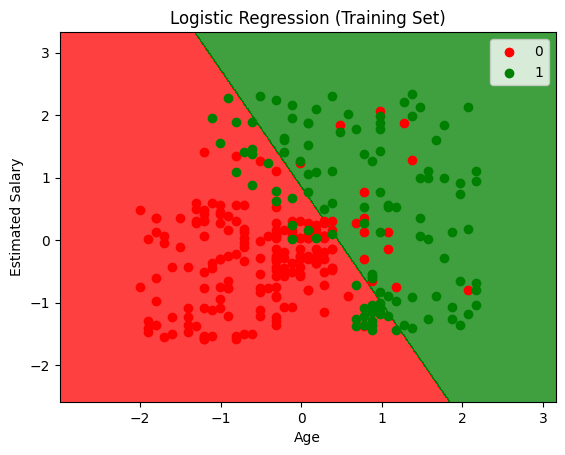

In [45]:
# Step 7: Visualisasi Area Keputusan Logistic Regression pada Data Training
plot_decision_boundary(X_train, y_train, logistic_model, 'Logistic Regression (Training Set)')

<ipython-input-44-d1d437032959>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


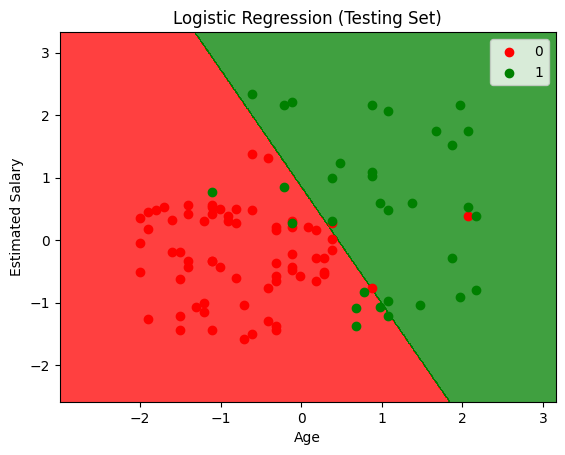

In [46]:
# Step 8: Visualisasi Area Keputusan Logistic Regression pada Data Testing
plot_decision_boundary(X_test, y_test, logistic_model, 'Logistic Regression (Testing Set)')

<ipython-input-44-d1d437032959>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


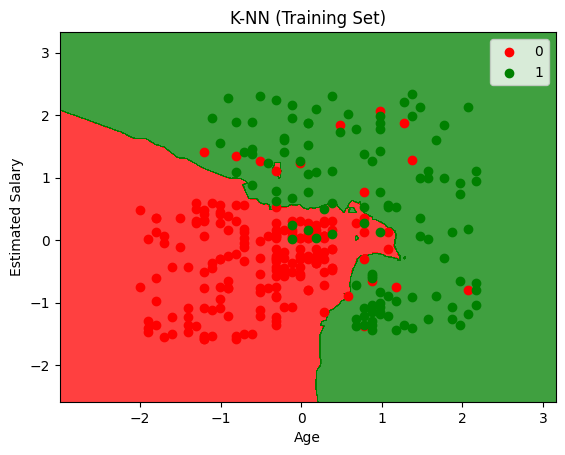

In [48]:
# Step 9: Visualisasi Area Keputusan K-NN pada Data Training
plot_decision_boundary(X_train, y_train, knn_model, 'K-NN (Training Set)')

<ipython-input-44-d1d437032959>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


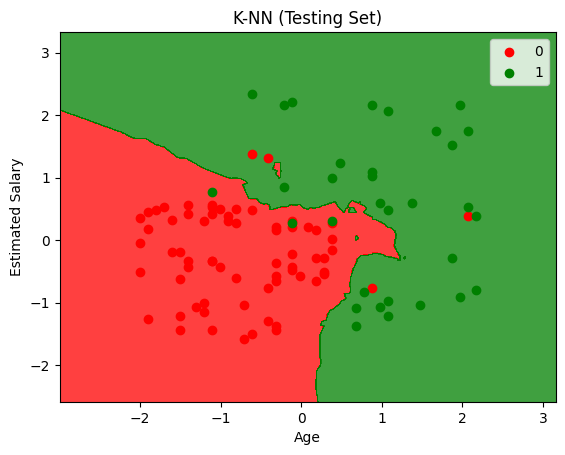

In [49]:
# Step 10: Visualisasi Area Keputusan K-NN pada Data Testing
plot_decision_boundary(X_test, y_test, knn_model, 'K-NN (Testing Set)')

Berdasarkan hasil evaluasi dan visualisasi dari model Logistic Regression dan K-Nearest Neighbors (K-NN) yang telah dijalankan pada dataset Social_Network_Ads.csv, berikut adalah beberapa kesimpulan yang dapat diambil:

1. Akurasi Model:


*   Logistic Regression:

  *   Akurasi: Memberikan hasil akurasi yang baik dalam memprediksi apakah seseorang akan membeli produk berdasarkan usia dan gaji mereka.

  *   Confusion Matrix: Menunjukkan seberapa baik model memprediksi kelas dengan benar versus salah.